In [2]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train=pd.read_csv('/content/drive/My Drive/Sangam/DataSets/Train.csv')
test=pd.read_csv('/content/drive/My Drive/Sangam/DataSets/Test.csv')

In [170]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [171]:
test.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [51]:
len(train.columns),list(train.columns)

(15,
 ['date_time',
  'is_holiday',
  'air_pollution_index',
  'humidity',
  'wind_speed',
  'wind_direction',
  'visibility_in_miles',
  'dew_point',
  'temperature',
  'rain_p_h',
  'snow_p_h',
  'clouds_all',
  'weather_type',
  'weather_description',
  'traffic_volume'])

In [52]:
print(len(train),len(test))

33750 14454


In [0]:
def convert_to_cat(col,data):
  # Create a label (category) encoder object
  le = preprocessing.LabelEncoder()
  # Fit the encoder to the pandas column
  data[col] = data[col].astype('|S80') 
  le.fit(data[col])
  # View the labels (if you want)
  #print(list(le.classes_))
  # Apply the fitted encoder to the pandas column
  data[col]=(le.transform(data[col])).astype('float64')
  #print(data[col].head())
  #print('\n')
  # Convert some integers into their category names
  #list(le.inverse_transform([2, 2, 1]))

In [0]:
def preprocess(data):
  cat=[]
  data=data.drop(columns=['date_time'])
  for i in data.columns:
    print(i, "-->>> ",data[i].dtype)
    if(data[i].dtype=='object'):
      cat.append(i)
  #print('\n')    
  #cat
  #print(cat)
  for col in cat:
    convert_to_cat(col,data)
    #data=train_data.fillna(0)
  #print(train_data['type_of_shot'])
  #X_df=train_data.drop(columns=['is_goal','shot_id_number'])
  Y=data['traffic_volume']
  X_df=data
  X_df=X_df.drop(columns=['traffic_volume'])
  print(X_df.head())
  X=X_df.as_matrix()
  print("Attributes=:",X.shape[1])
  #X = preprocessing.scale(X)
  return X,Y

def preprocess_test(data):
  cat=[]
  data=data.drop(columns=['date_time'])
  for i in data.columns:
    print(i, "-->>> ",data[i].dtype)
    if(data[i].dtype=='object'):
      cat.append(i)
  #print('\n')    
  #cat
  #print(cat)
  for col in cat:
    convert_to_cat(col,data)
    #data=train_data.fillna(0)
  #print(train_data['type_of_shot'])
  #X_df=train_data.drop(columns=['is_goal','shot_id_number'])
  #Y=data['traffic_volume']
  X_df=data
  #X_df=X_df.drop(columns=['traffic_volume'])
  print(X_df.head())
  X=X_df.as_matrix()
  print("Attributes=:",X.shape[1])
  #X = preprocessing.scale(X)
  return X


In [176]:
data_new=train

X,Y=preprocess(data_new)

is_holiday -->>>  object
air_pollution_index -->>>  int64
humidity -->>>  int64
wind_speed -->>>  int64
wind_direction -->>>  int64
visibility_in_miles -->>>  int64
dew_point -->>>  int64
temperature -->>>  float64
rain_p_h -->>>  float64
snow_p_h -->>>  float64
clouds_all -->>>  int64
weather_type -->>>  object
weather_description -->>>  object
traffic_volume -->>>  int64
   is_holiday  air_pollution_index  ...  weather_type  weather_description
0         7.0                  121  ...           1.0                 24.0
1         7.0                  178  ...           1.0                  2.0
2         7.0                  113  ...           1.0                 19.0
3         7.0                   20  ...           1.0                 19.0
4         7.0                  281  ...           1.0                  2.0

[5 rows x 13 columns]
Attributes=: 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [177]:
X.shape, Y.shape

((33750, 13), (33750,))

In [178]:
X[0:5,:]

array([[  7.  , 121.  ,  89.  ,   2.  , 329.  ,   1.  ,   1.  , 288.28,
          0.  ,   0.  ,  40.  ,   1.  ,  24.  ],
       [  7.  , 178.  ,  67.  ,   3.  , 330.  ,   1.  ,   1.  , 289.36,
          0.  ,   0.  ,  75.  ,   1.  ,   2.  ],
       [  7.  , 113.  ,  66.  ,   3.  , 329.  ,   2.  ,   2.  , 289.58,
          0.  ,   0.  ,  90.  ,   1.  ,  19.  ],
       [  7.  ,  20.  ,  66.  ,   3.  , 329.  ,   5.  ,   5.  , 290.13,
          0.  ,   0.  ,  90.  ,   1.  ,  19.  ],
       [  7.  , 281.  ,  65.  ,   3.  , 329.  ,   7.  ,   7.  , 291.14,
          0.  ,   0.  ,  75.  ,   1.  ,   2.  ]])

In [179]:
Y[0:5]

0    5545
1    4516
2    4767
3    5026
4    4918
Name: traffic_volume, dtype: int64

# Using Classifiers

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [181]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(30375, 13) (3375, 13) (30375,) (3375,)


In [0]:
def find_correlation(X_train,y_train):
  l=[]
  for i in range(13):
    l.append(np.corrcoef(X_train[:,i],y_train))
  temp={}
  for i in range(len(l)):
    temp[i]=(l[i][0][1])  
  plt.plot(temp.values())

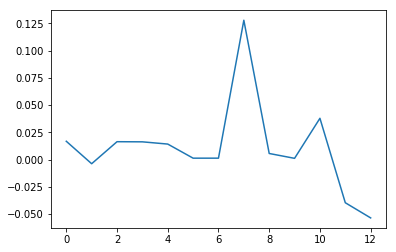

In [183]:
find_correlation(X,Y)

# Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [185]:
pred=linearRegressor.predict(X_test)
print(pred.shape,y_test.shape)

(3375,) (3375,)


In [186]:
min(y_test),max(y_test)

(1, 7107)

In [187]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)      

3873946.1991878706

In [189]:
XX_test=preprocess_test(test)

is_holiday -->>>  object
air_pollution_index -->>>  int64
humidity -->>>  int64
wind_speed -->>>  int64
wind_direction -->>>  int64
visibility_in_miles -->>>  int64
dew_point -->>>  int64
temperature -->>>  float64
rain_p_h -->>>  float64
snow_p_h -->>>  int64
clouds_all -->>>  int64
weather_type -->>>  object
weather_description -->>>  object
   is_holiday  air_pollution_index  ...  weather_type  weather_description
0         7.0                   73  ...           6.0                 15.0
1         7.0                  251  ...           5.0                 14.0
2         7.0                   75  ...           2.0                  9.0
3         7.0                   98  ...           6.0                  7.0
4         7.0                  283  ...           5.0                 14.0

[5 rows x 13 columns]
Attributes=: 13


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [0]:
pred=linearRegressor.predict(XX_test)

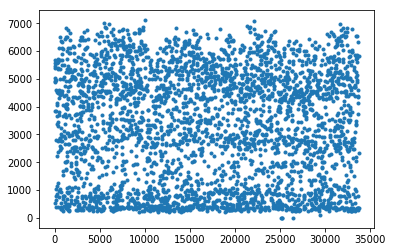

In [195]:
plt.plot(y_test,'.')

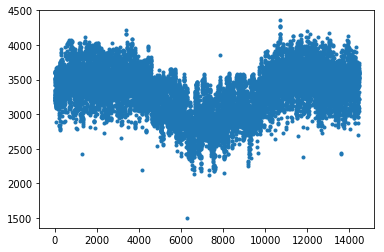

In [196]:
plt.plot(pred,'.')

In [215]:
temp=test
temp['traffic_volume']=pred
res=temp[['date_time','traffic_volume']]
tv=res['traffic_volume'].astype('int64')
res['traffic_volume']=tv
res.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,date_time,traffic_volume
0,2017-05-18 00:00:00,3197
1,2017-05-18 00:00:00,3249
2,2017-05-18 00:00:00,3459
3,2017-05-18 01:00:00,3349
4,2017-05-18 01:00:00,3349
5,2017-05-18 02:00:00,3204
6,2017-05-18 02:00:00,3228
7,2017-05-18 02:00:00,3480
8,2017-05-18 03:00:00,3231
9,2017-05-18 03:00:00,3253


In [225]:
train['date_time'][11]

'2012-10-02 20:00:00'

In [229]:
#Change the column format for the datetime column to yyyy-mm-dd hh:mm:ss in excel and reupload.
res['date_time'] = pd.to_datetime(res['date_time'])
print(res.head())
res.to_csv(r'result.csv')

            date_time  traffic_volume
0 2017-05-18 00:00:00            3197
1 2017-05-18 00:00:00            3249
2 2017-05-18 00:00:00            3459
3 2017-05-18 01:00:00            3349
4 2017-05-18 01:00:00            3349


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#ANN

In [100]:
from keras.models import Sequential
from keras.layers import Dense
# Using Relu activation, and Adam optimizer, 50 epochs
model = Sequential()
model.add(Dense(6, input_dim=13, activation='relu'))
model.add(Dense(3,activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 6)                 84        
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 21        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 4         
Total params: 109
Trainable params: 109
Non-trainable params: 0
_________________________________________________________________


In [101]:
# Train model
history = model.fit(X_train, y_train, nb_epoch=10, batch_size=20,  verbose=1)
# Print Accuracy
scores = model.evaluate(X_test, y_test) 
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
27000/27000 [==============================] - 2s 78us/step - loss: 14442387.0667 - acc: 7.4074e-05
Epoch 2/10
27000/27000 [==============================] - 1s 54us/step - loss: 14442387.0726 - acc: 7.4074e-05
Epoch 3/10
27000/27000 [==============================] - 1s 54us/step - loss: 14442387.1111 - acc: 7.4074e-05
Epoch 4/10
27000/27000 [==============================] - 1s 55us/step - loss: 14442387.0993 - acc: 7.4074e-05
Epoch 5/10
27000/27000 [==============================] - 1s 54us/step - loss: 14442387.0985 - acc: 7.4074e-05
Epoch 6/10
27000/27000 [==============================] - 1s 54us/step - loss: 14442387.1059 - acc: 7.4074e-05
Epoch 7/10
27000/27000 [==============================] - 1s 54us/step - loss: 14442387.0996 - acc: 7.4074e-05
Epoch 8/10
27000/27000 [==============================] - 1s 54us/step - loss: 14442387.0900 - acc: 7.4074e-05
Epoch 9/10
27000/27000 [==============================] - 1s 54us/step - loss: 14442387.0926 - acc: 7.4074e-05
E